Outliers in der Spalte 'windspeed_10m_max (km/h)':
      Casual        Date  Member  Total_rides  apparent_temperature_mean (°C)  \
119     2475  2021-04-30    3877         6352                            12.7   
299     2717  2021-10-27    8561        11278                            12.5   
413     1580  2022-02-18    3880         5460                             3.8   
414     1886  2022-02-19    3170         5056                            -4.5   
721      446  2022-12-23    1269         1715                            -5.7   
802     1509  2023-03-14    4847         6356                            -3.9   
820     5830  2023-04-01    5550        11380                            15.0   
913     6649  2023-07-03    7430        14079                            27.7   
926     6086  2023-07-16    7005        13091                            29.9   
933     7837  2023-07-23    7961        15798                            28.5   
938     5001  2023-07-28    8106        13107             

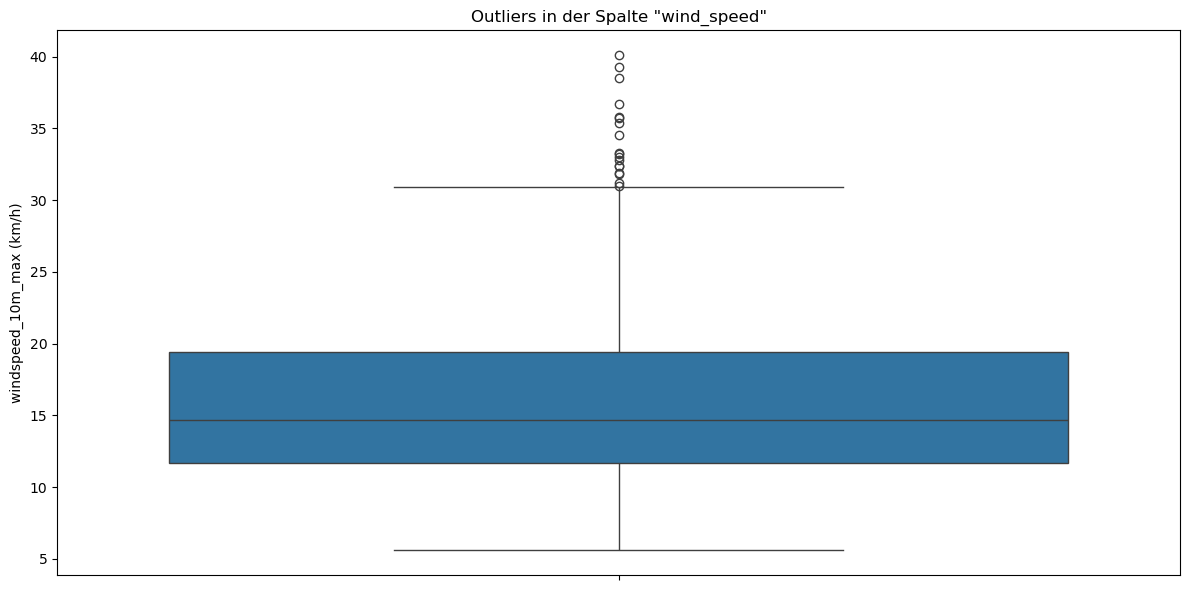

In [ ]:
#finde outliers von Windgeschwindigkeit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Laden der täglichen Wetterdaten
df_daily = pd.read_csv("CBS_2021-2023_Daily_Weather_Extended.csv", sep =',')

# Funktion zum Identifizieren von Outliers mit der IQR-Methode
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Beispiel: Outliers in der Spalte 'wind_speed' finden
outliers_wind_speed = find_outliers(df_daily, 'windspeed_10m_max (km/h)')

# Anzeigen der Outliers
print("Outliers in der Spalte 'windspeed_10m_max (km/h)':")
print(outliers_wind_speed)

# Visualisierung der Outliers mit Boxplots
plt.figure(figsize=(12, 6))

sns.boxplot(y=df_daily['windspeed_10m_max (km/h)'])
plt.title('Outliers in der Spalte "wind_speed"')

plt.tight_layout()
plt.show()

In [60]:
# Entfernen der Outliers aus der Spalte 'windspeed_10m_max (km/h)'
df_cleaned = df_daily[~df_daily.index.isin(outliers_wind_speed.index)]

# Überprüfen der Form des bereinigten DataFrames
print(df_cleaned.shape)

# Speichern des bereinigten DataFrames in einer neuen CSV-Datei
df_cleaned.to_csv("CBS_2021-2023_Daily_Weather_Cleaned.csv", index=False)

# Anzeigen der ersten Zeilen des bereinigten DataFrames
df_cleaned.head()

(1077, 15)


,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),is_weekend,day_type,is_holiday,season,warm_day,rainy_day,wind_category
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,False,Workday,Yes,Winter,No,Yes,Moderate Wind (10-20 km/h)
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,True,Weekend,No,Winter,No,Yes,Moderate Wind (10-20 km/h)
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,True,Weekend,No,Winter,No,Yes,Moderate Wind (10-20 km/h)
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,False,Workday,No,Winter,No,No,Moderate Wind (10-20 km/h)
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,False,Workday,No,Winter,No,Yes,Low Wind (<10 km/h)


Outliers in der Spalte 'windspeed_10m (km/h)':
       Casual        Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
468      92.0  2021-01-20    12    72.0        164.0                       49   
469      75.0  2021-01-20    13   144.0        219.0                       44   
470     103.0  2021-01-20    14   132.0        235.0                       40   
471      79.0  2021-01-20    15   143.0        222.0                       42   
472      85.0  2021-01-20    16   139.0        224.0                       41   
...       ...         ...   ...     ...          ...                      ...   
25827     6.0  2023-12-13     3     1.0          7.0                       32   
25828     5.0  2023-12-13     4    13.0         18.0                       31   
25829    24.0  2023-12-13     5    54.0         78.0                       40   
25830    52.0  2023-12-13     6   166.0        218.0                       48   
25831   134.0  2023-12-13     7   527.0        661.0          

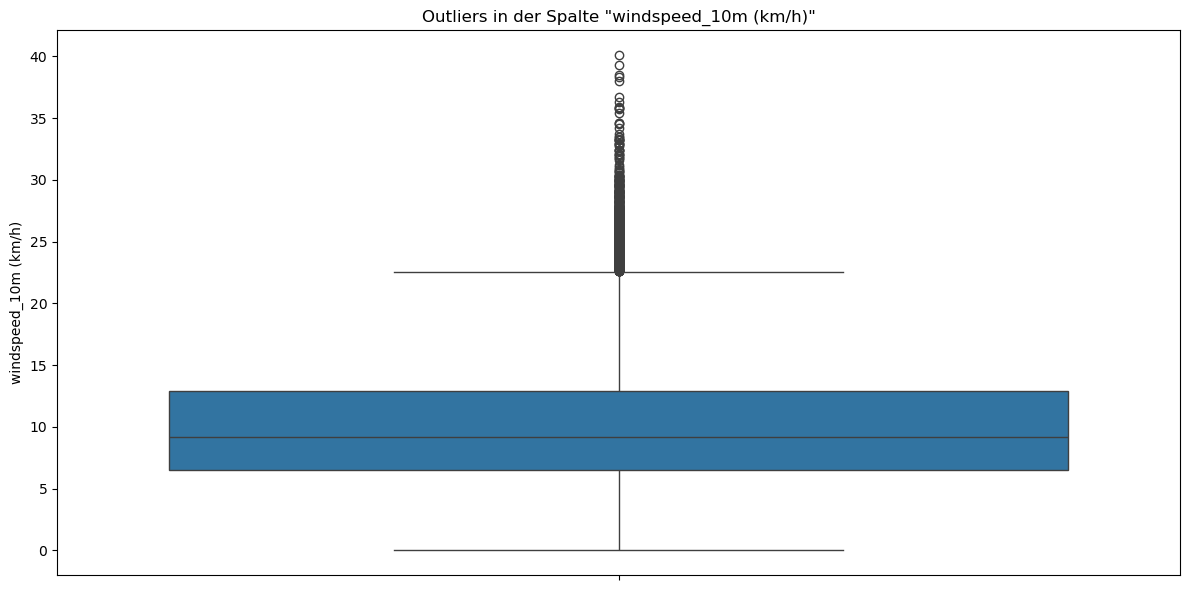

(25515, 16)


,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),is_weekend,day_type,is_holiday,season,Temperature Category,Weather Category,wind_category
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,False,Workday,Yes,Winter,Cold,Dry Day,Moderate Wind (10-20 km/h)
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,False,Workday,Yes,Winter,Cold,Dry Day,Moderate Wind (10-20 km/h)
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,False,Workday,Yes,Winter,Cold,Dry Day,Moderate Wind (10-20 km/h)
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,False,Workday,Yes,Winter,Cold,Dry Day,Moderate Wind (10-20 km/h)
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,False,Workday,Yes,Winter,Cold,Dry Day,Low Wind (<10 km/h)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Laden der stündlichen Wetterdaten
df_hourly = pd.read_csv("CBS_2021-2023_Hourly_Weather_Extended.csv", sep =',')

# Funktion zum Identifizieren von Outliers mit der IQR-Methode
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Beispiel: Outliers in der Spalte 'windspeed_10m (km/h)' finden
outliers_wind_speed = find_outliers(df_hourly, 'windspeed_10m (km/h)')

# Anzeigen der Outliers
print("Outliers in der Spalte 'windspeed_10m (km/h)':")
print(outliers_wind_speed)

# Visualisierung der Outliers mit Boxplots
plt.figure(figsize=(12, 6))

sns.boxplot(y=df_hourly['windspeed_10m (km/h)'])
plt.title('Outliers in der Spalte "windspeed_10m (km/h)"')

plt.tight_layout()
plt.show()

# Entfernen der Outliers aus der Spalte 'windspeed_10m (km/h)'
df_cleaned = df_hourly[~df_hourly.index.isin(outliers_wind_speed.index)]

# Überprüfen der Form des bereinigten DataFrames
print(df_cleaned.shape)

# Speichern des bereinigten DataFrames in einer neuen CSV-Datei
df_cleaned.to_csv("CBS_2021-2023_Hourly_Weather_Cleaned.csv", index=False)

# Anzeigen der ersten Zeilen des bereinigten DataFrames
df_cleaned.head()